#Tarea 2

In [1]:
using PyPlot;

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

In [15]:
c=-0.123 + 0.745im 
f(z)=z^2+c

f (generic function with 1 method)

In [4]:
"""Funcion que crea una malla cuadrada de condiciones iniciales en el plano comlejo  con tres
parametros de entrada:

m= numero de puntos en los que se quiere dividir el intervalo real y el intervalo imaginario 
(en total se tendran m^2 condiciones iniciales)
Real= intervalo en el eje real en donde se construye la malla; se debe dar en forma de arreglo
Imag= intervalo en el eje imaginario en donde se construye la malla; se debe dar en forma de 
arreglo
"""
function malla{T<:Int}(m::T,Real::Array{T,1},Imag::Array{T,1})
    Re=linspace(Real[1],Real[end],m)
    Im=linspace(Real[1],Real[end],m)
    malla=zeros(Complex,m,m)
    for i in 1:length(Re)
        for j in 1:length(Im)
            malla[j,i]=Re[i]-Im[j]im
        end 
    end
    return malla
end 

malla (generic function with 1 method)

In [26]:
m=500
init_cond=malla(m,[-1,1],[-1,1]);

In [34]:
#initial_cond=reshape(malla,m*m,1)
N=500#numero de iteraciones
Z=zeros(Complex,m,m)
for i in 1:m
    for j in 1:m
        Z[j,i]=init_cond[j,i]
        for k in 1:N
            Z[j,i]=f(Z[j,i])
        end
    end 
end

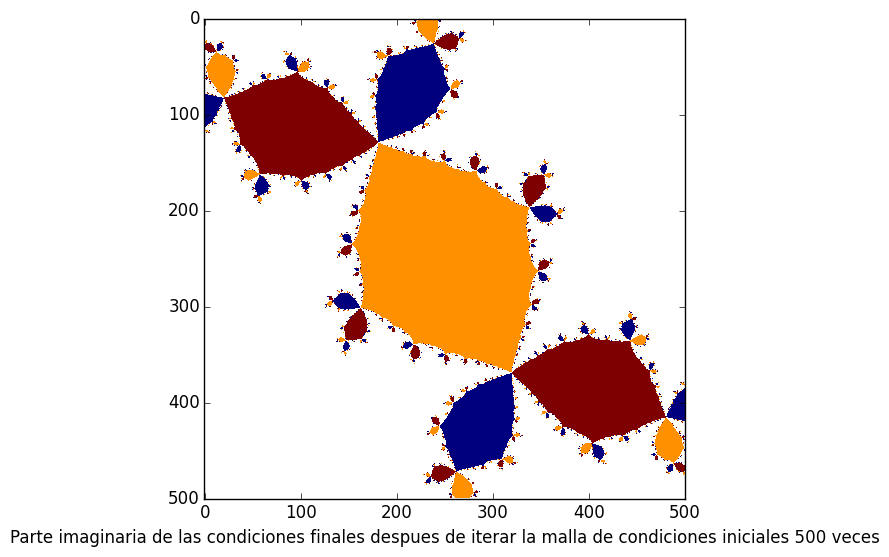

In [35]:
imshow(imag(Z),interpolation="nearest")
xlabel("Parte imaginaria de las condiciones finales despues de iterar la malla de condiciones iniciales $N veces " );

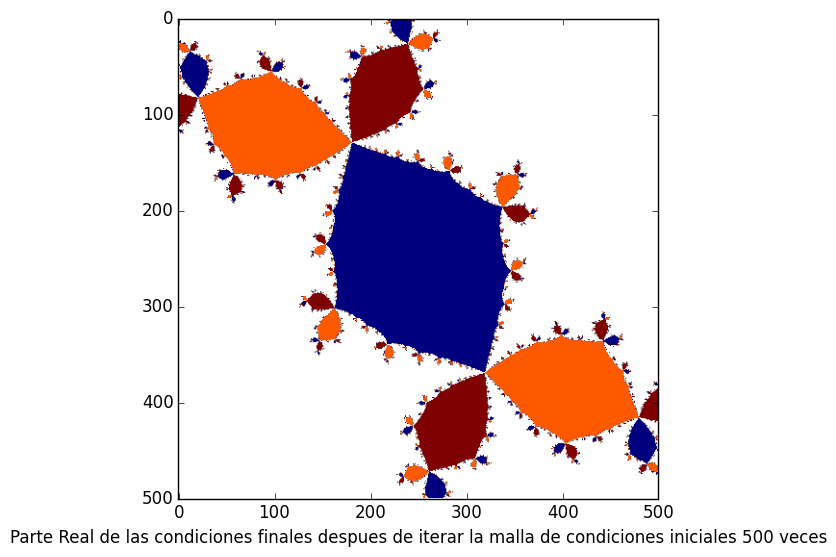

In [36]:
imshow(real(Z))
xlabel("Parte Real de las condiciones finales despues de iterar la malla de condiciones iniciales $N veces " );

En las dos figuras anteriores, se observa que la malla de condiciones iniciales converge a tres valores distintos indicados por los tres colores diferentes que se aprecian en los mapas de color (el color blanco representa todos los puntos que divergen después de un número finito de iteraciones). Todo esto esta relacionado con los conjuntos de Fatou y los conjuntos de Julia. 

#Contando el numero de iteraciones en que tarda en diverger

Una pregunta que se puede hacer observando las figuras anteriores es que tan rápido divergen las condiciones iniciales, o cuánto tardan en converger.
Las siguientes líneas de código crean conjuntos de Julia (y de Fatou) con este concepto. Se cuenta cuantas iteraciones se necesitan par aque una condicion inicial diverja (

In [56]:
"""Funcion que grafica el conjunto de Julia generado por el mapeo f(z,c), en donde z 
es la variable en el plano complejo y c el parametro que caracteriza al 
sistema dinamico z_{n+1}=f(z_n)

init_cond =  la malla de condiciones iniciales en el plano complejo 

m =  numero limite de iteraciones del mapeo"""
function Julia_set(f,c,init_cond,m)
    
    

In [326]:
#initial_cond=reshape(malla,m*m,1)
N=80#numero  MAXIMO de iteraciones
Z=zeros(Complex,m,m)
iterandos=zeros(m,m)
for i in 1:m
    for j in 1:m
        Z[j,i]=malla[j,i]
        for k in 1:N
            Z[j,i]=f(Z[j,i])
            iterandos[j,i]=k
            if 
                abs(Z[j,i])>=4
                break
            end 
            #if 
             #   abs(Z[j,i])>=10
              #  break
            #end 
        end
    end 
end

In [327]:
iterandos

1000x1000 Array{Float64,2}:
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  

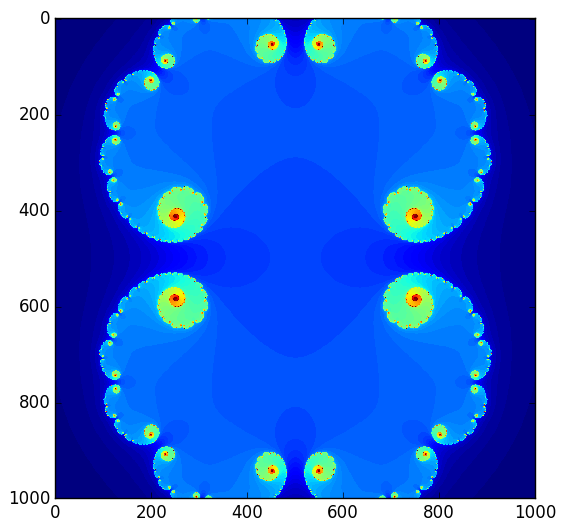

PyObject <matplotlib.image.AxesImage object at 0x3545bfd90>

In [328]:
imshow(iterandos,interpolation="nearest")

In [337]:
prueba=zeros(10,10)
for i in 1:100
    prueba[i]=i
end 

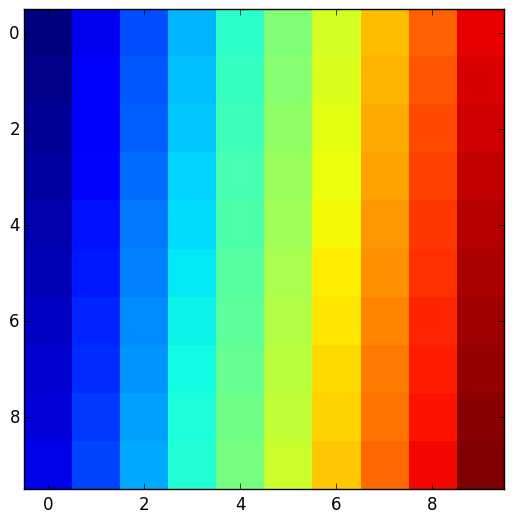

PyObject <matplotlib.image.AxesImage object at 0x356014890>

In [338]:
imshow(prueba,interpolation="nearest")

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{x_n}) = 2x_n \mod 1.
\end{equation}

- Obtengan los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{x_n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

In [20]:
"""dyn_sys(x) es la función que representa la operación x mod(1) pero ésta función solo 
esta definida en el dominio correspondiente al intervalo (0,1).Esta definida con la 
siguiente regla de correspondencia:

1) dyn_sys(x)=2x, si x ∈(0,0.5)
ó
2) dyn_sys(x)=2x-1, si x∈[0.5,1)

"""
function dyn_sys(x)
    if 0<=x<0.5
        ds=2*x
    elseif 0.50<=x<=1
        ds=2*x-1
    else
        println("Domain error ")
    end 
    return ds
end 

dyn_sys (generic function with 1 method)

In [21]:
incond=0.35  #condicion inicial
m=60 #numero de iteraciones
x=zeros(m)
x[1]=dyn_sys(incond)
for i in 1:m-1
    x[i+1]=dyn_sys(x[i])
end 


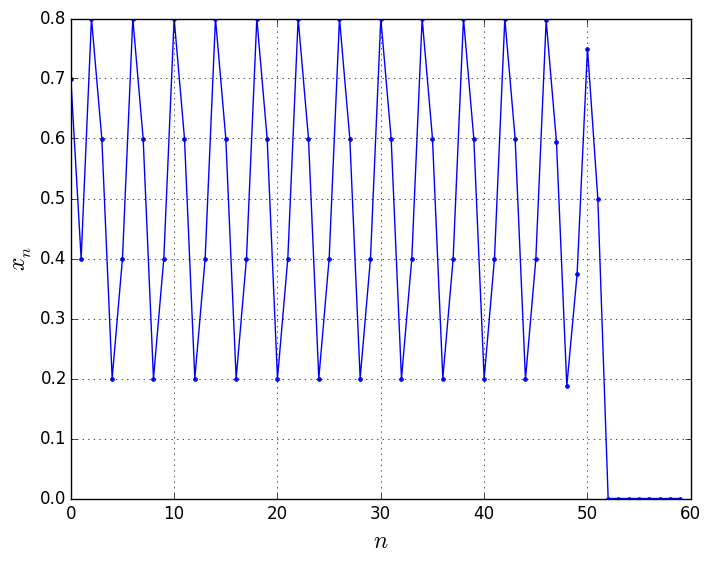

In [22]:
plot(x,"b.-");
ylabel(L"x_{n}",size=17)
xlabel(L"n",size=17)
grid("on");

In [42]:
n=10 #numero de condiciones iniciales
initial_cond=linspace(0,1,n)  #condiciones iniciales
m=60 #numero de iteraciones
x=zeros(m,n)
for j in 1:n
    x[1,j]=dyn_sys(initial_cond[j])
    for i in 1:m-1
        x[i+1,j]=dyn_sys(x[i,j])
    end 
end 


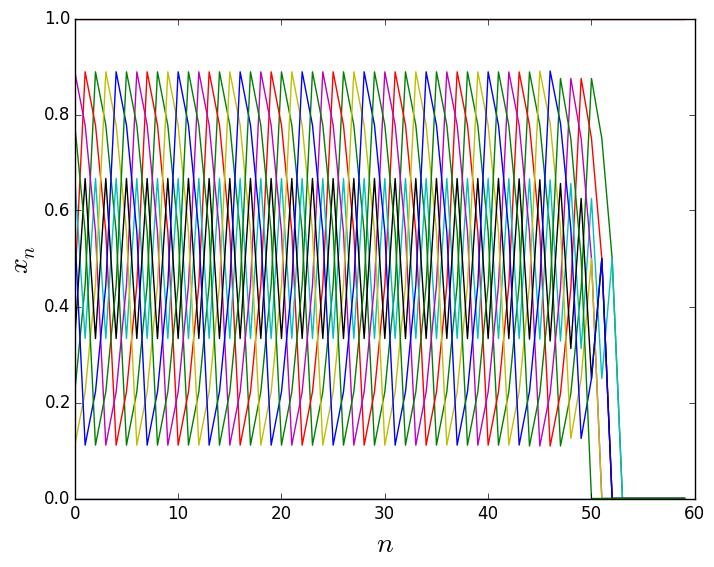

In [71]:
for i in 1:n
    plot(x[:,i])
end 
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);

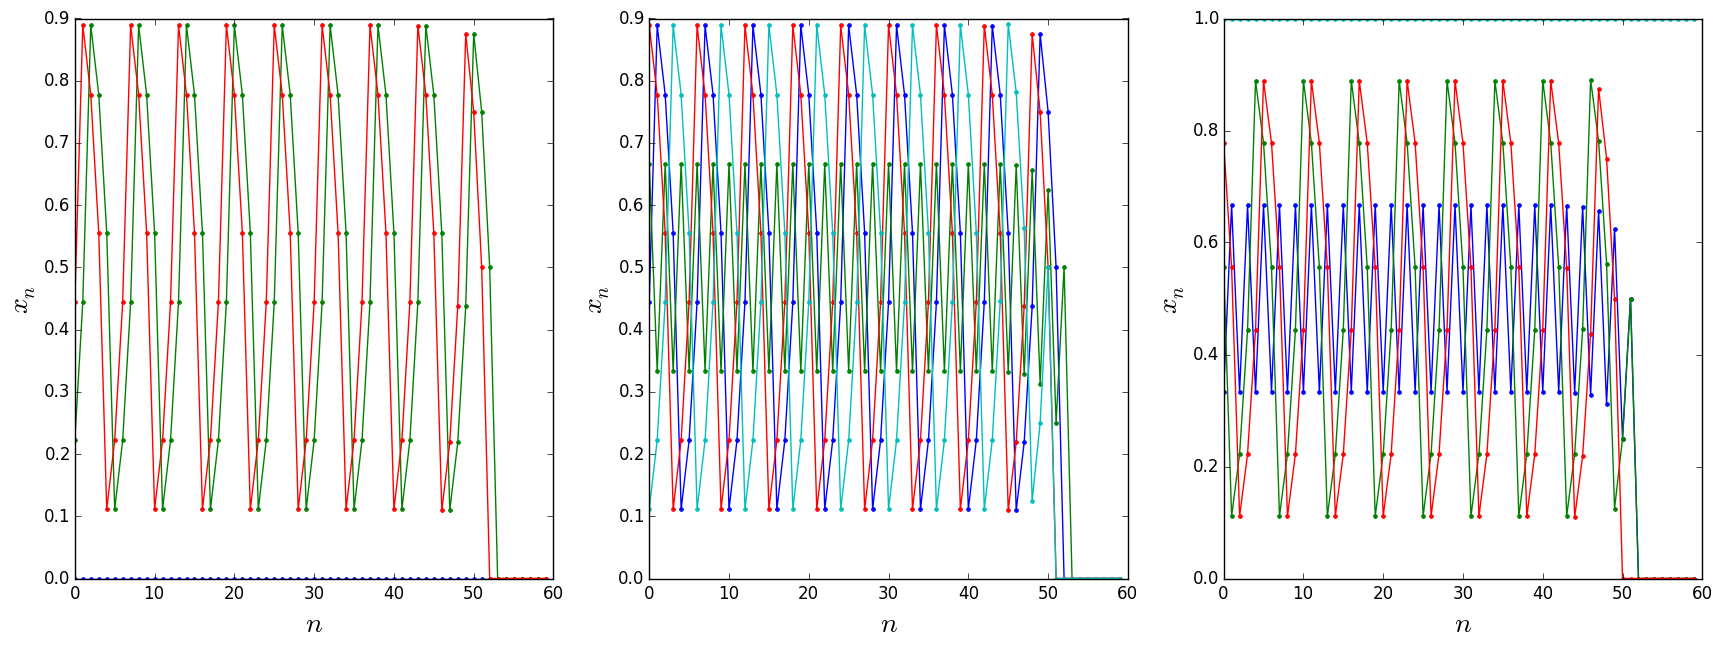

In [72]:
figure("pyplot_subplot_mixed",figsize=(21,7))
subplot(131)
for i in 1:3
    plot(x[:,i],".-")
end
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);


subplot(132)
for i in 3:6
    plot(x[:,i],".-")
end 
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);

subplot(133)
for i in 7:10
    plot(x[:,i],".-")
end 
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);

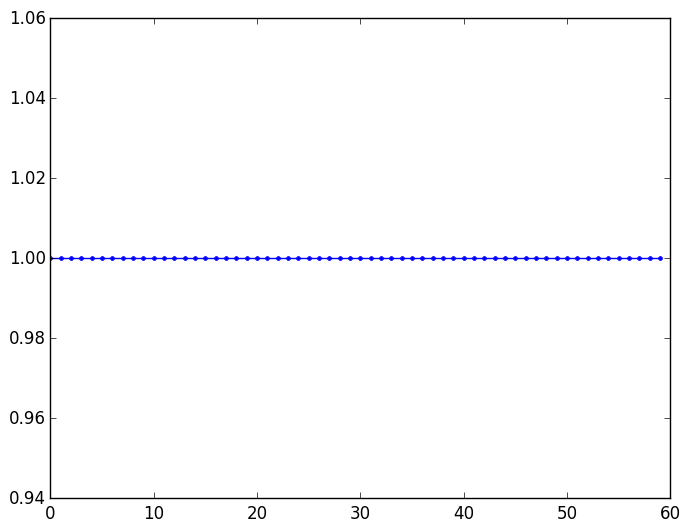

In [69]:
cont=10
plot(x[:,cont],".-");